# Analysing the host information including;age, location,gender and status for the possible prediction of outcome of recovery vs Death

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv('data_results.csv')

In [3]:
# iterating the columns 
for col in data.columns: 
    print(col) 

virus_name
accession_id
type
lineage
passage_details_history
collection_date
location
host
additional_location_information
gender
age
status
specimen_source
additional_host_information
outbreak
last_vaccinated
treatment
sequencing_technology
assembly_method
coverage
comment
originating_lab
address
sample_id_given_by_the_sample_provider
submitting_lab
sample_id_given_by_the_submitting_laboratory
authors
submitter
submission_date
query
strand
%n
length(nt)
length(aa)
#muts
%muts
#uniquemuts
%uniquemuts
#existingmuts
%existingmuts
symbol
reference
uniquemutlist
existingmutlist
clade
ifexistspecialchar


# Preprocessing and cleaning the data

In [4]:

#important features
start_data_row = 0
Final_data_row = 1129
Data = data.loc[start_data_row:Final_data_row,['location','gender','age','status']]
#change the index of the data according to the length of the new data
Data.index = range(len(Data))

In [5]:
#getting rid of NaN data
Data.dropna(subset = ['status'], inplace=True)
Data.index = range(len(Data))

In [6]:
#getting rid of NaN data
#getting rid of NaN data
Data.drop(Data.loc[Data['status']=='unknown'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='n/a'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='NA'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='-'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='Unknown'].index, inplace=True)
Data.index = range(len(Data))

In [7]:
#organizing the location based on the continent and country (For USA: continent,country, and state )
Location = Data.location.str.split('/')
listToStr_location = list()
for i in range(len(Location)):  
    if Location[i][1:2][0]!=' USA ':
        Location[i] = Location[i][0:2]
        listToStr_location. append(' '.join([str(elem) for elem in Location[i]]))
    else:
        Location[i] = Location[i][0:3]
        listToStr_location. append(' '.join([str(elem) for elem in Location[i]]))
listToStr_location

['Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Europe   Belgium ',
 'Europe   Belgium ',
 'Europe   Belgium ',
 'Europe   Belgium ',
 'Europe   Belgium ',
 'Europe   Belgium ',
 'Europe   Belgium ',
 

In [8]:
Data.location =listToStr_location
Data.groupby('location')
Data

,location,gender,age,status
0,Asia Bangladesh,Female,43,Live
1,Asia Bangladesh,Female,85,Released
2,Asia Bangladesh,Male,42,Released
3,Asia Bangladesh,Male,48,Unknow
4,Asia Bangladesh,Male,23,Released
...,...,...,...,...
1005,North America USA Louisiana,Female,27,Alive
1006,North America USA Louisiana,Male,45,Alive
1007,North America USA Louisiana,Female,63,Alive
1008,North America USA Louisiana,Female,55,Alive


In [9]:
#replacing the age that were in months to year

Data['age'] = Data['age'].str.replace('months','')
Data['age'] = Data['age'].str.replace('month','')
Data['age'] = Data['age'].str.replace('s','')

for i in range(1,len(Data)):
    index_1 = Data.age[i].find(',') 
    index_2 = Data.age[i].find('-') 
    index_3 = Data.age[i].find('unknown') 
    index_4 = Data.age[i].find('week')
    index_5 = Data.age[i].find('Unknown') 
    if index_1!=-1:
        Data.age[i] = Data.age[i][:index_1]
        Data.age[i] = int(float(Data.age[i])/12)
    if index_2!=-1:
        Data.age[i] = int((float(Data.age[i][index_2+1:])+float(Data.age[i][:index_2]))/2)
    if index_3!=-1:
        Data.age[i] = 'NaN'
    if index_4!=-1:
        Data.age[i] = Data.age[i][:index_4]
        Data.age[i] = int(float(Data.age[i])/4)
    if index_5!=-1:
        Data.age[i] = 'NaN'

In [10]:

#deleting the >, 's and s from age
Data['age'] = Data['age'].str.replace('>','')
Data['age'] = Data['age'].str.replace('s','')
Data['age'] = Data['age'].str.replace("'",'')

In [11]:
#the unknown gender is set to missing category
for i in range(1,len(Data)):
    index_4 = Data.gender[i].find('unknown') 
    if index_4!=-1:
        Data.gender[i] = 4


In [12]:
#labeling the data
Data.replace(['female','Female'],value= [1,1], inplace=True)
Data.replace(['male','Male'],value= [0,0], inplace=True)
    

In [13]:
#Labeling
Data.status[Data['status'] != 'Deceased']='Recovered'

### Imputing the unknown data using KNN

In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit(Data[['age']])
Data['age']=imputer.transform(Data[['age']])
Data['age']=imputer.transform(Data[['age']])

In [15]:
#Finding unknown data
Data.loc[Data['gender']=='unknown']

,location,gender,age,status


In [16]:
#using dummies instead of location data for ML input
#using dummies instead of location data for ML input
Data_model = pd.concat([pd.get_dummies(Data[['location']]), Data[['gender','age','status']]], axis=1)
Data_model.head()


,location_Africa Morocco,location_Africa Nigeria,location_Asia Bangladesh,location_Asia China,location_Asia Hong Kong,location_Asia India,location_Asia Indonesia,location_Asia Iran,location_Asia Israel,location_Asia Japan,...,location_North America USA California,location_North America USA California,location_North America USA Louisiana,location_North america Mexico,location_Oceania Guam,location_South America Brazil,location_South America Colombia,gender,age,status
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,43.0,Recovered
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,85.0,Recovered
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,42.0,Recovered
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,48.0,Recovered
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,23.0,Recovered


In [17]:
#checking the balance in the data
Data_model['status'].value_counts()

Recovered    969
Deceased      41
Name: status, dtype: int64

In [18]:
Data_model.columns

Index(['location_Africa   Morocco', 'location_Africa   Nigeria ',
       'location_Asia   Bangladesh ', 'location_Asia   China ',
       'location_Asia   Hong Kong', 'location_Asia   India ',
       'location_Asia   Indonesia ', 'location_Asia   Iran ',
       'location_Asia   Israel ', 'location_Asia   Japan',
       'location_Asia   Kazakhstan ', 'location_Asia   Lebanon ',
       'location_Asia   Malaysia', 'location_Asia   Malaysia ',
       'location_Asia   Mongolia', 'location_Asia   Oman ',
       'location_Asia   Singapore', 'location_Asia   Sri Lanka',
       'location_Asia   Taiwan ', 'location_Asia   Turkey ',
       'location_Europe   Belgium ',
       'location_Europe   Bosnia and Herzegovina ',
       'location_Europe   Croatia ', 'location_Europe   Cyprus',
       'location_Europe   France ', 'location_Europe   Germany ',
       'location_Europe   Greece ', 'location_Europe   Italy ',
       'location_Europe   Poland ', 'location_Europe   Romania ',
       'location_Euro

# Data visualization

In [19]:
subset_attributes = ['location_Africa   Morocco', 'location_Africa   Nigeria ',
       'location_Asia   Bangladesh ', 'location_Asia   China ',
       'location_Asia   Hong Kong', 'location_Asia   India ',
       'location_Asia   Indonesia ', 'location_Asia   Iran ',
       'location_Asia   Israel ', 'location_Asia   Japan',
       'location_Asia   Kazakhstan ', 'location_Asia   Lebanon ',
       'location_Asia   Malaysia', 'location_Asia   Malaysia ',
       'location_Asia   Mongolia', 'location_Asia   Oman ',
       'location_Asia   Singapore', 'location_Asia   Sri Lanka',
       'location_Asia   Taiwan ', 'location_Asia   Turkey ',
       'location_Europe   Belgium ',
       'location_Europe   Bosnia and Herzegovina ',
       'location_Europe   Croatia ', 'location_Europe   Cyprus',
       'location_Europe   France ', 'location_Europe   Germany ',
       'location_Europe   Greece ', 'location_Europe   Italy ',
       'location_Europe   Poland ', 'location_Europe   Romania ',
       'location_Europe   Russia ', 'location_Europe   Spain ',
       'location_Europe   Turkey ', 'location_Europe   ‎Romania ',
       'location_North America   Canada ',
       'location_North America   Costa Rica ',
       'location_North America   Mexico', 'location_North America   Mexico ',
       'location_North America   USA   California',
       'location_North America   USA   California ',
       'location_North America   USA   Louisiana',
       'location_North america   Mexico ', 'location_Oceania   Guam',
       'location_South America   Brazil ',
       'location_South America   Colombia ', 'gender', 'age', 'status']
round(Data_model[subset_attributes].describe(),2)



,location_Africa Morocco,location_Africa Nigeria,location_Asia Bangladesh,location_Asia China,location_Asia Hong Kong,location_Asia India,location_Asia Indonesia,location_Asia Iran,location_Asia Israel,location_Asia Japan,...,location_North America Mexico,location_North America Mexico,location_North America USA California,location_North America USA California,location_North America USA Louisiana,location_North america Mexico,location_Oceania Guam,location_South America Brazil,location_South America Colombia,age
count,1010.00,1010.00,1010.00,1010.00,1010.00,1010.00,1010.00,1010.00,1010.00,1010.00,...,1010.00,1010.00,1010.00,1010.00,1010.00,1010.00,1010.00,1010.00,1010.00,1010.00
mean,0.02,0.01,0.01,0.13,0.05,0.21,0.01,0.00,0.03,0.00,...,0.00,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.11,46.93
std,0.14,0.12,0.08,0.33,0.21,0.41,0.09,0.04,0.17,0.03,...,0.04,0.09,0.03,0.03,0.15,0.03,0.03,0.07,0.32,19.57
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,32.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,46.93
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,60.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,98.00


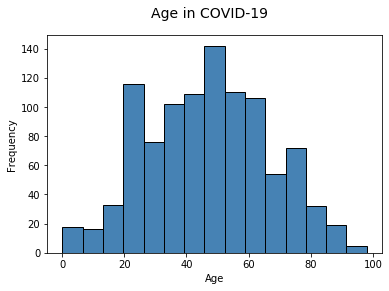

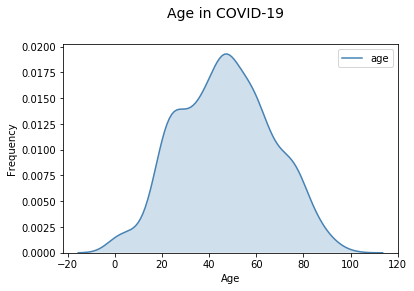

In [20]:
# Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Age in COVID-19", fontsize=14)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency") 

freq, bins, patches = ax.hist(Data_model['age'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Age in COVID-19", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency") 
sns.kdeplot(Data_model['age'], ax=ax1, shade=True, color='steelblue') 

C:\Users\Azadeh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


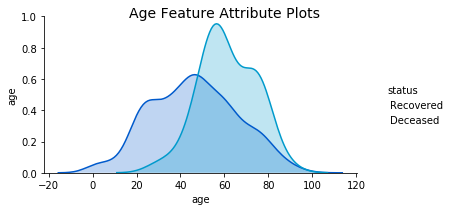

In [24]:

cols = ['gender', 'age', 'status']
pp = sns.pairplot(Data_model[cols], hue='status', size=2.8, aspect=1.8, 
                  palette={"Deceased": "#009acc", "Recovered": "#005acc"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Age Feature Attribute Plots', fontsize=14)